# Central Limit Theorem

In the previous section, we constructed the sampling distribution of the mean by drawing many samples from the parent distribution

You may have noticed that the sampling distribution of the mean had a familiar bell curve shape - it resembles a Normal distribution.

Indeed, when $n$ is large enough (above about 50) the sampling distribution of the mean is well approximated by a normal distribution, whose standard deviation is the standard error of the mean. This result, which is one of the most important in statistics, is called the **Central Limit Theorem**.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Load and plot the data

Once again we use the fictional BrexDex data:

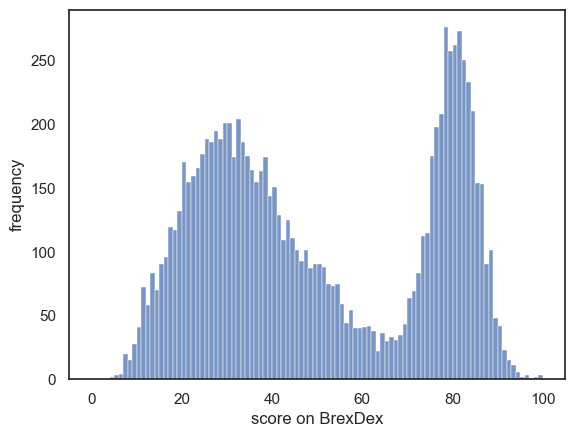

In [2]:
UKBrexdex=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/UKBrexdex.csv')
sns.histplot(UKBrexdex.score, bins=range(101))
plt.xlabel('score on BrexDex')
plt.ylabel('frequency')
plt.show()

## Normal Distribution

The <b>Central Limit Theorem</b> states that when $n$ is sufficiently large, the sampling distribution of the means of samples of size $n$ is a normal distribution, with a mean equivalent to the mean of the parent distribution, and a standard deviation equivalent to the SEM.

Let's check how well our sampling distribution for samples of size n=100 matches the predicted normal distribution.

First we regenerate our 10,000 samples of size 100:

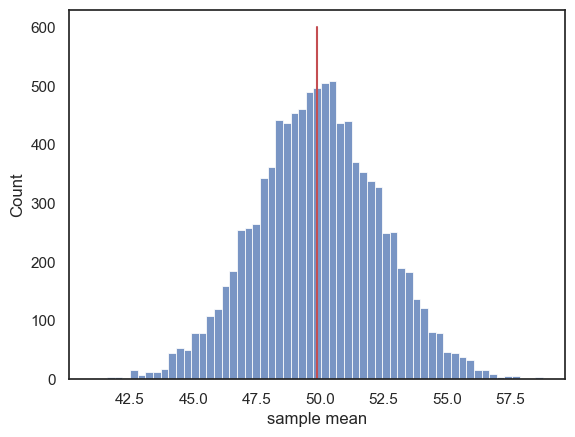

In [3]:
nSamples = 10000 # we will draw 10,000 samples
n=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = UKBrexdex.sample(n=100, replace=False)
    m[i]=sample.score.mean()

sns.histplot(m)
plt.plot([UKBrexdex.score.mean(), UKBrexdex.score.mean()],[0,600],'r-') # add a line for the population mean
plt.xlabel('sample mean')
plt.show()

Now we make our predicted normal sampling distribution of the mean.

Its mean $\mu$ should be the mean of the parent distribution:

In [4]:
mu = UKBrexdex.score.mean()
print(mu)

49.8748


Its standard deviation should be the SEM: 

$$SEM = \frac{\sigma}{\sqrt{n}} $$

where $\sigma$ is the standard deviaition of the parent distribution:

In [5]:
SEM = UKBrexdex.score.std()/(n**0.5)
print(SEM)

2.479272056187636


Then we obtain the PDF of the normal distribution $\mathcal{N}(\mu, SEM)$ for a suitable range of x-axis values (based on the histogram above):

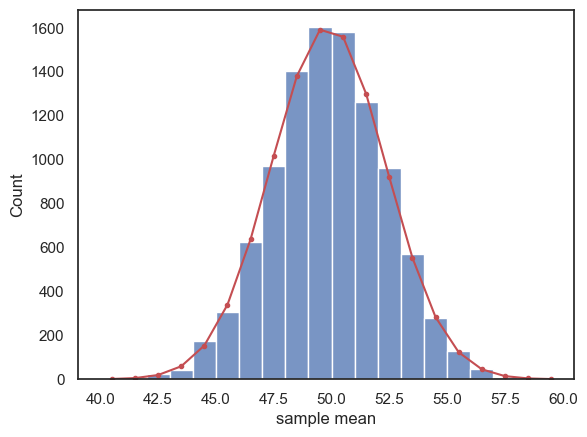

In [6]:
x = np.arange(40.5,60.5) # x axis values are from 40.5 to 60.5 (the .5 is to match the middle of the bars in the histogram)
p = stats.norm.pdf(x,mu,SEM) 
freq = p*nSamples # expected frequency of each sample mean is the probability of that sample mean, time total number of samples (10,000 in our example)

sns.histplot(m, bins=range(40,60))
plt.plot(x,freq,'r.-')
plt.xlabel('sample mean')
plt.show()

This is not a bad match!

## How unusual is my sample mean?

Say we give the Brexdex questionnaire to 100 statistics undergraduates in Oxford, and their mean score is 55.1, as opposed to the mean in the UK national sample, 49.9. Can we infer that the students have different political attitude to the UK population as a whole?

The sampling distribution of the mean tells us the distribution of sample means we expect to get if we draw samples from the parent population (the UK national sample)

### Using the simulated sampling distribution of the mean

What proportion of sample means in our simulated sampling distribution exceeded 55.1?

In [7]:
# regenerate the sampling distribubtion
nSamples = 10000 # we will draw 10,000 samples
samplesize=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = UKBrexdex.sample(n=samplesize, replace=False)
    m[i]=sample.score.mean()
    
print('proportion of sample means greater than 55.1 = ' + str((m>55.1).mean()) +  ' or ' + str((m>55.1).mean()*100) + '%')

proportion of sample means greater than 55.1 = 0.0172 or 1.72%


In other words, the mean Brexdex score of the students was high enough that we would expect it to occur less than 2% of the time for samples drawn from the UK national population - we might conclude that the political attitudes of the students differ from those of the population as a whole.

### Using the Normal distribution

We can ask how likely this mean was to have occurred under the assumption that the Oxford students have similar political attitudes to the population as a whole, using the CDF of the normal distribution:

In [8]:
mu = UKBrexdex.score.mean()
SEM = UKBrexdex.score.std()/(n**0.5)

p = 1-stats.norm.cdf(55.1,mu,SEM) 
print('proportion of sample means greater than 55.1 = ' + str(p) +  ' or ' + str(p*100) + '%')

proportion of sample means greater than 55.1 = 0.01753478848973844 or 1.753478848973844%


Hopefully this proportion agrees fairly well with the proportion of actual sample means exceeding 55.1 in the simulation

## But...

It is unusual that we are able to compare a sample to a known population distribution.

It is *possible* - for example, standardized tests (including IQ tests and SATs) do have known population distributions.

However the more likely scenario is that we have *only* the small sample to work from, and we want to *infer* the population distribution from that sample.

The next section deals with this problem.